In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
df = pd.read_excel("Projekt-2_Data.xlsx")

## ÚLOHA 1 – Bayesovské odhady

### a) Konjugované apriorní a aposteriorní rozdělení, prediktivní rozdělení

> Předpokládáme, že počet připojení na internetovou síť za 1 ms je popsaný náhodnou veličinou
s Poissonovým rozdělením s parametrem 𝜆, t.j. 𝑋~𝑃𝑜(𝜆).
O parametru 𝜆 máme následující expertní odhad: každých 5 ms by mělo nastat 10 připojení.
Pozorovali jsme připojení po dobu 100 ms. Pozorovaní o počtu připojení za každou 1 ms jsou
uvedené v souboru measurements.csv ve sĺoupci „úloha_1 a)“.
Vašim zadáním je z této expertní informace urči konjugované apriorní rozdělení k parametru
Poissonova rozdělení a na základě pozorovaní určit aposteriorní rozdělení. Dále určete
apriorní a aposteriorní prediktivní rozdělení pozorovaní.

#### 1) Do jednoho obrázku vykreslíte apriorní a aposteriorní hustotou parametru Poissonova rozdělení 𝜆.

Keďže máme informáciu o distribúcii intervalov medzi udalosťami (10 pripojení/5ms), môžme podľa tabuľky konjugovaných rozdelení, použiť Gamma rozdelenie na aproximácou Poissonovho rozdelenia. Pretože Gamma rozdelenie s $\alpha = k$, kde $k$ je počet udalosti a $\beta = \frac{1}{\lambda}$ konverguje k Poissonovmu rozdeleniu so strednou hodnotou $\lambda$.

In [7]:
from scipy.stats import gamma

$\alpha = 10$  
$\beta = \frac{1}{5}$

In [77]:
# Parametre apriornej gama distribúcie
lambda_poiss = 5
alpha = 10  # k
beta = 1 / lambda_poiss

# Generovanie hodnôt parametra lambda
lambda_values = np.linspace(0, 10, 1000)

# Výpočet apriornej hustoty gama distribúcie
prior_density = gamma.pdf(lambda_values, alpha, scale=beta)

In [89]:
postreior_a = alpha + df["uloha_1 a)"].sum()
posterior_l = lambda_poiss + df["uloha_1 a)"].count()
posterior_b = 1 / posterior_l
post_density = gamma.pdf(lambda_values, postreior_a, scale=posterior_b)

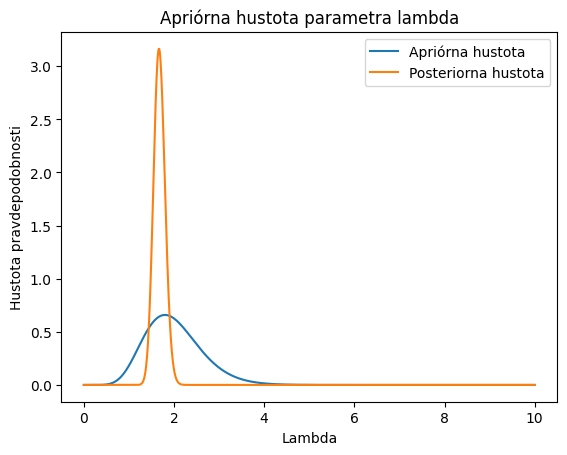

In [90]:
plt.plot(lambda_values, prior_density, label='Apriórna hustota')
plt.plot(lambda_values, post_density, label='Posteriorna hustota')
plt.title('Apriórna hustota parametra lambda')
plt.xlabel('Lambda')
plt.ylabel('Hustota pravdepodobnosti')
plt.legend()
plt.show()

#### 2) Do jednoho obrázku vykreslíte apriorní a aposteriorní prediktivní hustotou pozorovaní 𝑥 za jeden časový interval.

In [98]:
from scipy.stats import poisson
x_values = np.arange(df["uloha_1 a)"].min(), df["uloha_1 a)"].max() * 2 + 1)

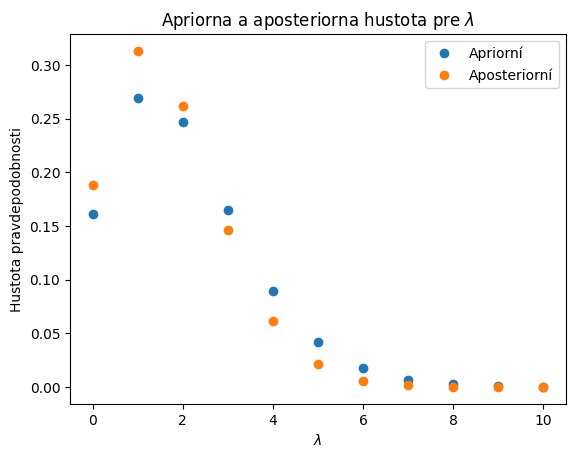

In [100]:
prior_distribution = gamma(alpha, scale=beta)
posterior_distribution = gamma(postreior_a, scale=posterior_b)

prior_predictive = poisson.pmf(x_values, mu=alpha_prior/lambda_poiss)
posterior_predictive = poisson.pmf(x_values, mu=postreior_a/posterior_l)

prior_predictive = nbinom.pmf(x_values, n=alpha, p=lambda_poiss/(lambda_poiss+1))
posterior_predictive = nbinom.pmf(x_values, n=postreior_a, p=posterior_l/(posterior_l+1))

plt.plot(x_values, prior_predictive, 'o', label='Apriorní')
plt.plot(x_values, posterior_predictive, 'o', label='Aposteriorní')

plt.title('Apriorna a aposteriorna hustota pre $\lambda$')
plt.ylabel('Hustota pravdepodobnosti')
plt.xlabel('$\lambda$')
plt.legend()
plt.show()

#### 3) Sestrojte 95% interval spolehlivosti pro parametr 𝜆 z apriorního a aposteriorního rozdělení a porovnejte je.

In [107]:
print("95% Interval spolehlivosti pro 𝜆 z apriorneho rozdelenia:", prior_distribution.interval(0.95))
print("95% Interval spolehlivosti pro 𝜆 z aposteriorneho rozdelenia:", posterior_distribution.interval(0.95))

95% Interval spolehlivosti pro 𝜆 z apriorneho rozdelenia: (0.9590777392264868, 3.416960690283833)
95% Interval spolehlivosti pro 𝜆 z aposteriorneho rozdelenia: (1.4376938284869922, 1.9327207471868797)


#### 4) Vyberte si dva aposteriorní bodové odhady parametru 𝜆, porovnejte je a okomentujte jejich výběr.

In [113]:
median_posterior = gamma.ppf(0.5, alpha_posterior, scale=posterior_b)
print("Stredna hodnota aposteriorneho rozdelenia:", postreior_a / posterior_l)
print("Median aposteriorneho rozdelenia:", median_posterior)


Stredna hodnota aposteriorneho rozdelenia: 1.6761904761904762
Median aposteriorneho rozdelenia: 1.6730169441241727


Stredná hodnota a median sú jedny z najjeednoduchších parametrov :)

Sú relatívne blízko, čo nám môže napovedať, že graf hustoty pravdepodobnosti bude takmer symetrický.

#### 5) Vyberte si jeden apriorní a jeden aposteriorní bodový odhad počtu pozorovaní a porovnejte je.


In [121]:
mean_prior_n = nbinom.mean(alpha, lambda_poiss/(lambda_poiss+1))
mean_posterior_n = nbinom.mean(postreior_a, posterior_l/(posterior_l+1))

# Výpis výsledků
print("Střední hodnota apriorního odhadu:", mean_prior_n)
print("Střední hodnota aposteriorního odhadu:", mean_posterior_n)

Střední hodnota apriorního odhadu: 1.9999999999999996
Střední hodnota aposteriorního odhadu: 1.6761904761904758


Vybral som strednu hodnotu :)

### b) Aproximace diskrétním rozdělením

#### 1) Do jednoho grafu vykreslíte apriorní, aposteriorní hustotou a funkci věrohodnosti. Funkci věrohodnosti normujte tak, aby jej součet byl 1 kvůli porovnatelnosti v obrázku.

#### 2) Z aposteriorní hustoty určete 95% interval spolehlivosti (konfidenční interval) pro parametr $b$.

#### 3) Vyberte dva bodové odhady parametru 𝑏 a spočítejte je.

### ÚLOHA 2 – Regrese

#### 1) Pomocí zpětné eliminace určete vhodný regresní model. Za výchozí „plný“ model považujte plný kvadratický model (všechny interakce druhého řádu a všechny druhé mocniny, které dávají smysl).
* Zapište rovnici Vašeho finálního modelu.
* Diskutujte splnění předpokladů lineární regrese a základní regresní
diagnostiky.
* Pokud (až během regresního modelování) identifikujete některé „extrémně
odlehlé hodnoty“ můžete ty „nejodlehlejší“ hodnoty, po alespoň krátkém
zdůvodnění, vyřadit.